In [1]:
import pandas as pd

### Open CSV File
The source of file is kaggle:
https://www.kaggle.com/datasets/abineshkumark/carsdata

In [2]:
df = pd.read_csv("auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
print(df.shape)
df.dtypes

(398, 9)


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

### Preprocessing

In [4]:
print ("Shape of dataset before cleaning: ", df.size)
df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin']] = (
       df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin']].apply(pd.to_numeric, errors='coerce'))
df = df.dropna()
df = df.reset_index(drop=True)

df.rename(columns={'car name': 'name', 'model year': 'year'}, inplace=True)

df['mpg'] = df['mpg'].astype(int)
df['displacement'] = df['displacement'].astype(int)
df['horsepower'] = df['horsepower'].astype(int)
df['acceleration'] = df['acceleration'].astype(int)

print ("Shape of dataset after cleaning: ", df.size)
df.head()

Shape of dataset before cleaning:  3582
Shape of dataset after cleaning:  3528


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18,8,307,130,3504,12,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11,70,1,buick skylark 320
2,18,8,318,150,3436,11,70,1,plymouth satellite
3,16,8,304,150,3433,12,70,1,amc rebel sst
4,17,8,302,140,3449,10,70,1,ford torino


In [8]:
featureset = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']]

### Fit data

In [9]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.24324324, 1.        , 0.61757106, 0.45652174, 0.5361497 ,
        0.25      , 0.        , 0.        ],
       [0.16216216, 1.        , 0.72868217, 0.64673913, 0.58973632,
        0.1875    , 0.        , 0.        ],
       [0.24324324, 1.        , 0.64599483, 0.56521739, 0.51686986,
        0.1875    , 0.        , 0.        ],
       [0.18918919, 1.        , 0.60981912, 0.56521739, 0.51601928,
        0.25      , 0.        , 0.        ],
       [0.21621622, 1.        , 0.60465116, 0.51086957, 0.52055571,
        0.125     , 0.        , 0.        ]])

### Normalize data

In [11]:
import scipy
import numpy as np
leng = feature_mtx.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

array([[0.        , 0.24875742, 0.13000238, ..., 1.4712608 , 1.49200985,
        1.51931161],
       [0.24875742, 0.        , 0.15926912, ..., 1.58450187, 1.61808878,
        1.6470796 ],
       [0.13000238, 0.15926912, 0.        , ..., 1.49669376, 1.53882531,
        1.56705178],
       ...,
       [1.4712608 , 1.58450187, 1.49669376, ..., 0.        , 0.46269705,
        0.51679582],
       [1.49200985, 1.61808878, 1.53882531, ..., 0.46269705, 0.        ,
        0.10713729],
       [1.51931161, 1.6470796 , 1.56705178, ..., 0.51679582, 0.10713729,
        0.        ]])

In [12]:
from scipy.cluster import hierarchy 
import scipy.spatial.distance as ssd
condensed_D = ssd.pdist(D)
Z = hierarchy.linkage(condensed_D, 'complete')

In [13]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([40, 39, 40, 40, 40, 37, 35, 35, 35, 37, 39, 39, 39, 35, 33, 51, 51,
       51, 33,  9, 12, 12, 12, 12, 51, 37, 36, 36, 36, 33,  7, 33, 50, 50,
       50, 50, 50, 41, 37, 41, 41, 37, 37, 37, 50,  7, 50, 50,  7, 11,  9,
       11, 32, 32,  9,  8, 34,  7,  9,  7,  7, 41, 39, 42, 41, 42, 37, 41,
       41, 37, 33, 42, 42, 42, 42, 10, 10, 10, 11,  7, 34, 34,  7, 34, 41,
       42, 42, 42, 42, 37, 39, 41, 42, 37, 35, 41, 50, 50, 50, 50, 52,  9,
       39, 39, 39, 39, 50, 34,  7, 34, 33,  7, 52,  5, 42, 37,  9,  5, 10,
       10, 42, 10, 28, 41, 55, 55, 56, 32, 14, 32, 14, 56, 56, 56, 42, 43,
       43, 43, 42,  5,  5,  5, 32, 32, 14,  5,  5, 34, 34,  5, 55, 56, 54,
       54, 38, 43, 43, 43, 54, 56, 56, 54, 55, 48, 46, 29, 14, 55, 14, 34,
        5, 34, 55,  6, 55,  3,  3,  3,  3, 29,  6,  6, 13, 14,  6, 46, 46,
       46, 43, 55, 56, 53, 55, 16, 16,  6, 29, 55, 54, 56, 55,  6, 29, 29,
       13,  3, 46,  4, 28, 57, 43, 43, 46, 46, 29, 17, 20, 13, 29, 46, 44,
       46, 46, 56, 55, 55

In [14]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 5, 5, 5, 2, 1, 1, 1,
       1, 1, 5, 3, 3, 3, 3, 2, 1, 2, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3,
       5, 1, 5, 5, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 2, 2, 1, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 1, 3, 3, 3, 3, 5, 2, 1, 2,
       2, 1, 5, 1, 3, 3, 1, 1, 1, 1, 3, 1, 2, 3, 5, 5, 5, 2, 1, 2, 1, 5,
       5, 5, 3, 3, 3, 3, 3, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 5, 5, 5, 5,
       3, 3, 3, 3, 5, 5, 5, 5, 5, 4, 4, 2, 1, 5, 1, 2, 1, 2, 5, 1, 5, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 4, 4, 3, 5, 5, 5, 5, 1, 1, 1, 2, 5,
       5, 5, 5, 1, 2, 2, 1, 1, 4, 1, 2, 5, 3, 3, 4, 4, 2, 1, 1, 1, 2, 4,
       4, 4, 4, 5, 5, 5, 5, 3, 3, 3, 3, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 2, 2, 4, 4, 4, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4,
       1, 2, 2, 1, 2, 1, 1, 2, 1, 5, 1, 5, 1, 2, 5, 5, 1, 5, 5, 4, 4, 4,
       4, 4, 4, 4, 4, 1, 2, 1, 1, 1, 4, 1, 4, 1, 1,

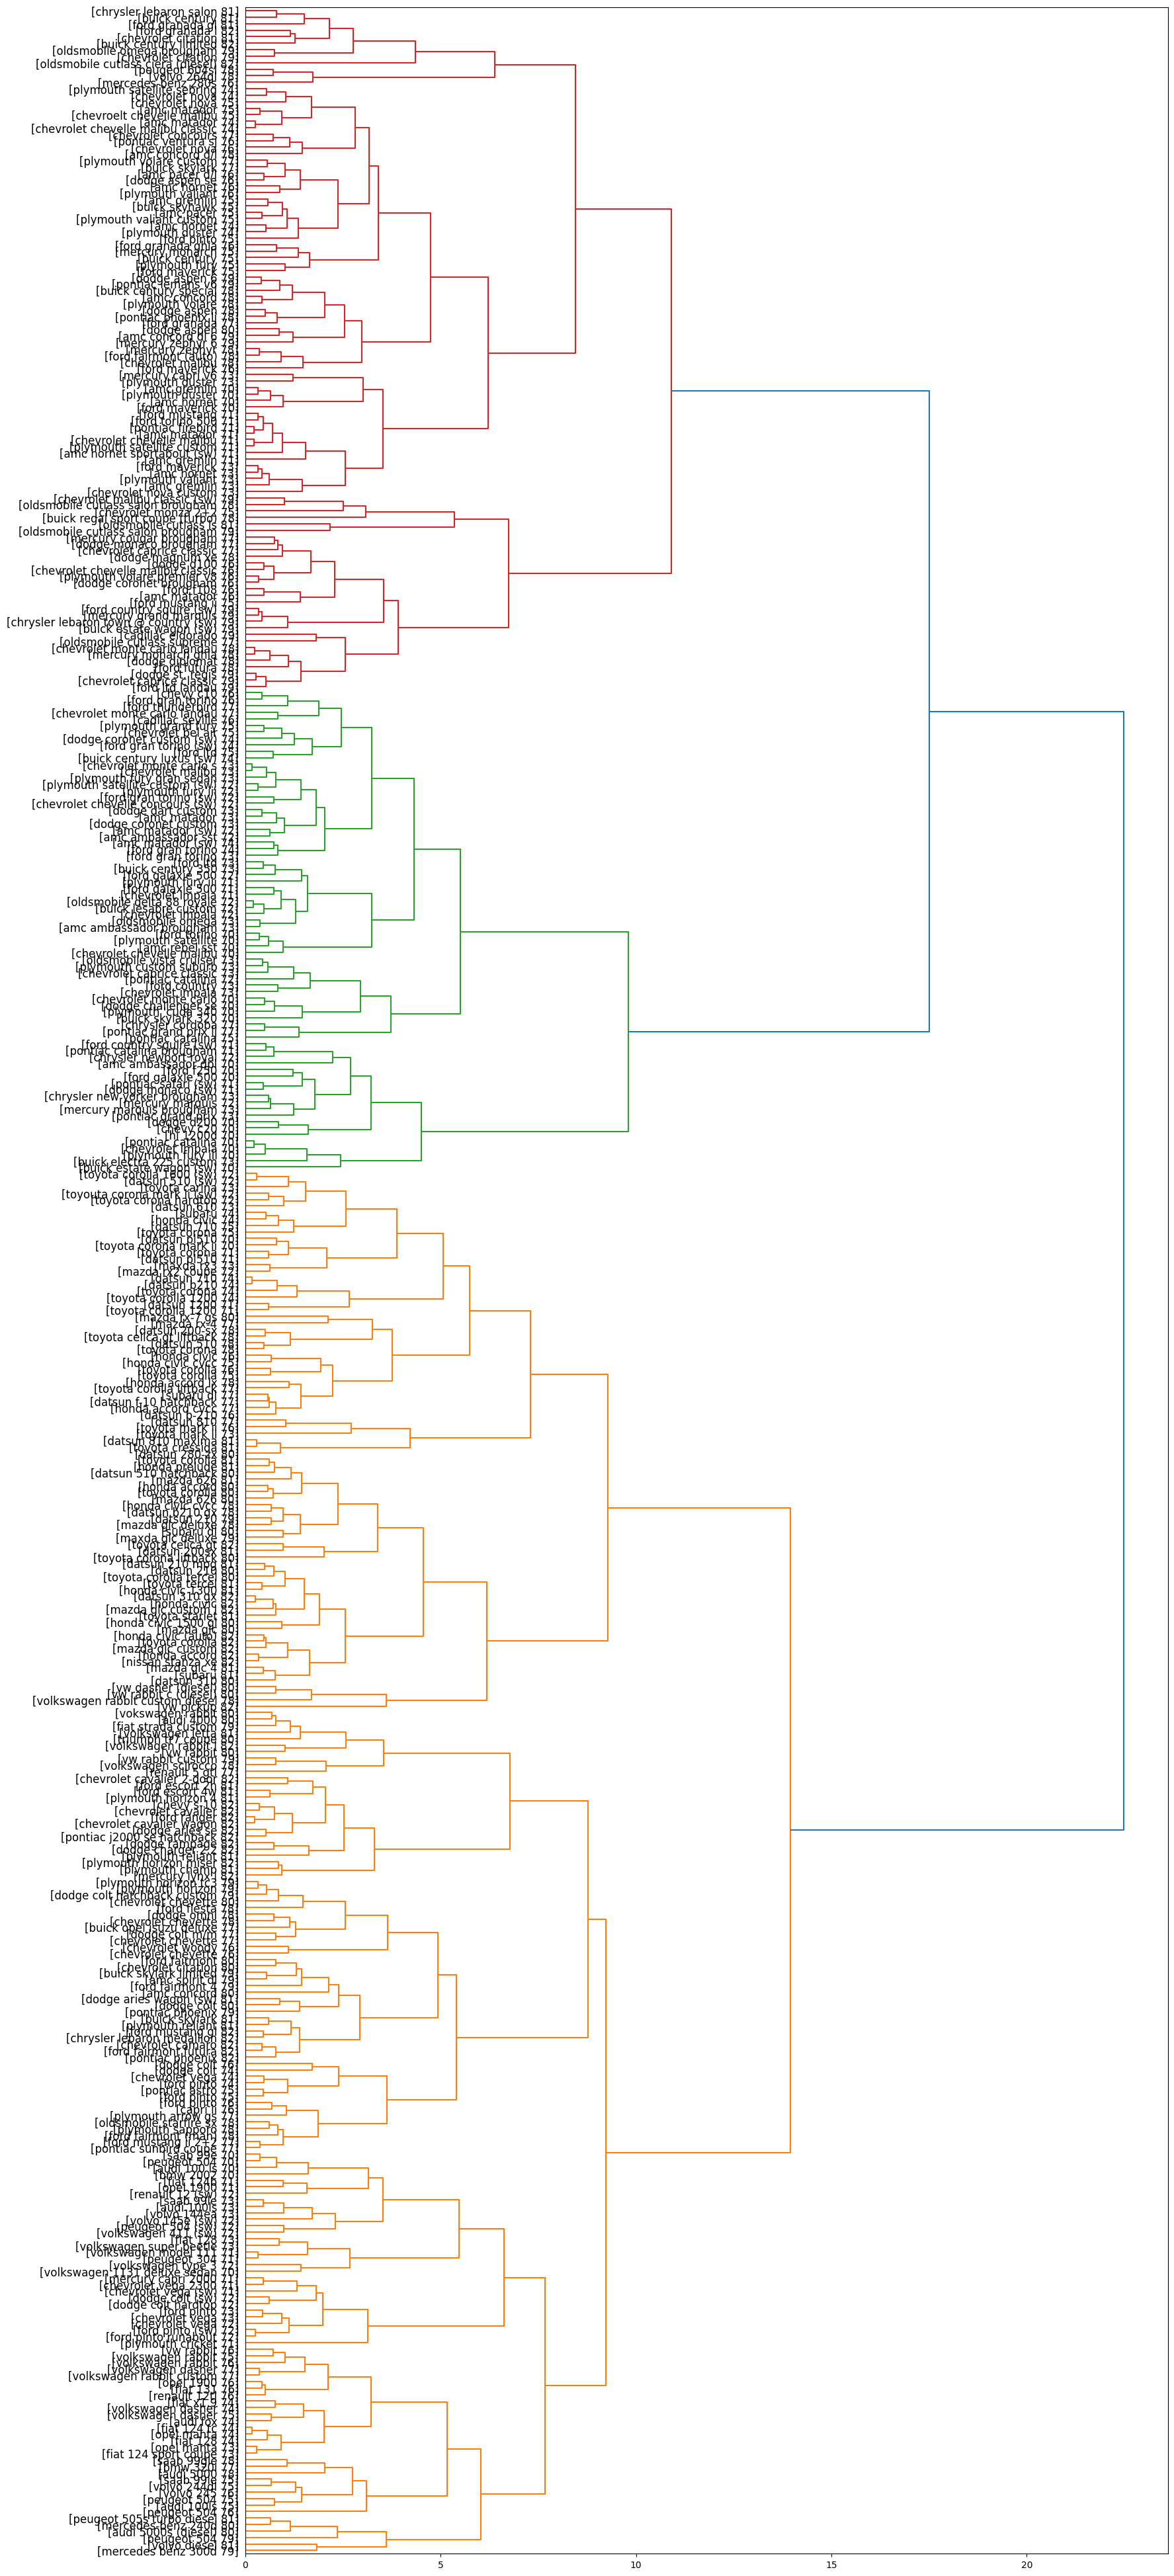

In [15]:
import pylab
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s]' % (df['name'][id], df['year'][id] )
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation='right')

In [16]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.24875742 0.13000238 ... 1.4712608  1.49200985 1.51931161]
 [0.24875742 0.         0.15926912 ... 1.58450187 1.61808878 1.6470796 ]
 [0.13000238 0.15926912 0.         ... 1.49669376 1.53882531 1.56705178]
 ...
 [1.4712608  1.58450187 1.49669376 ... 0.         0.46269705 0.51679582]
 [1.49200985 1.61808878 1.53882531 ... 0.46269705 0.         0.10713729]
 [1.51931161 1.6470796  1.56705178 ... 0.51679582 0.10713729 0.        ]]


In [17]:
condensed_distance = ssd.pdist(dist_matrix)
Z_using_dist_matrix = hierarchy.linkage(condensed_distance, 'complete')

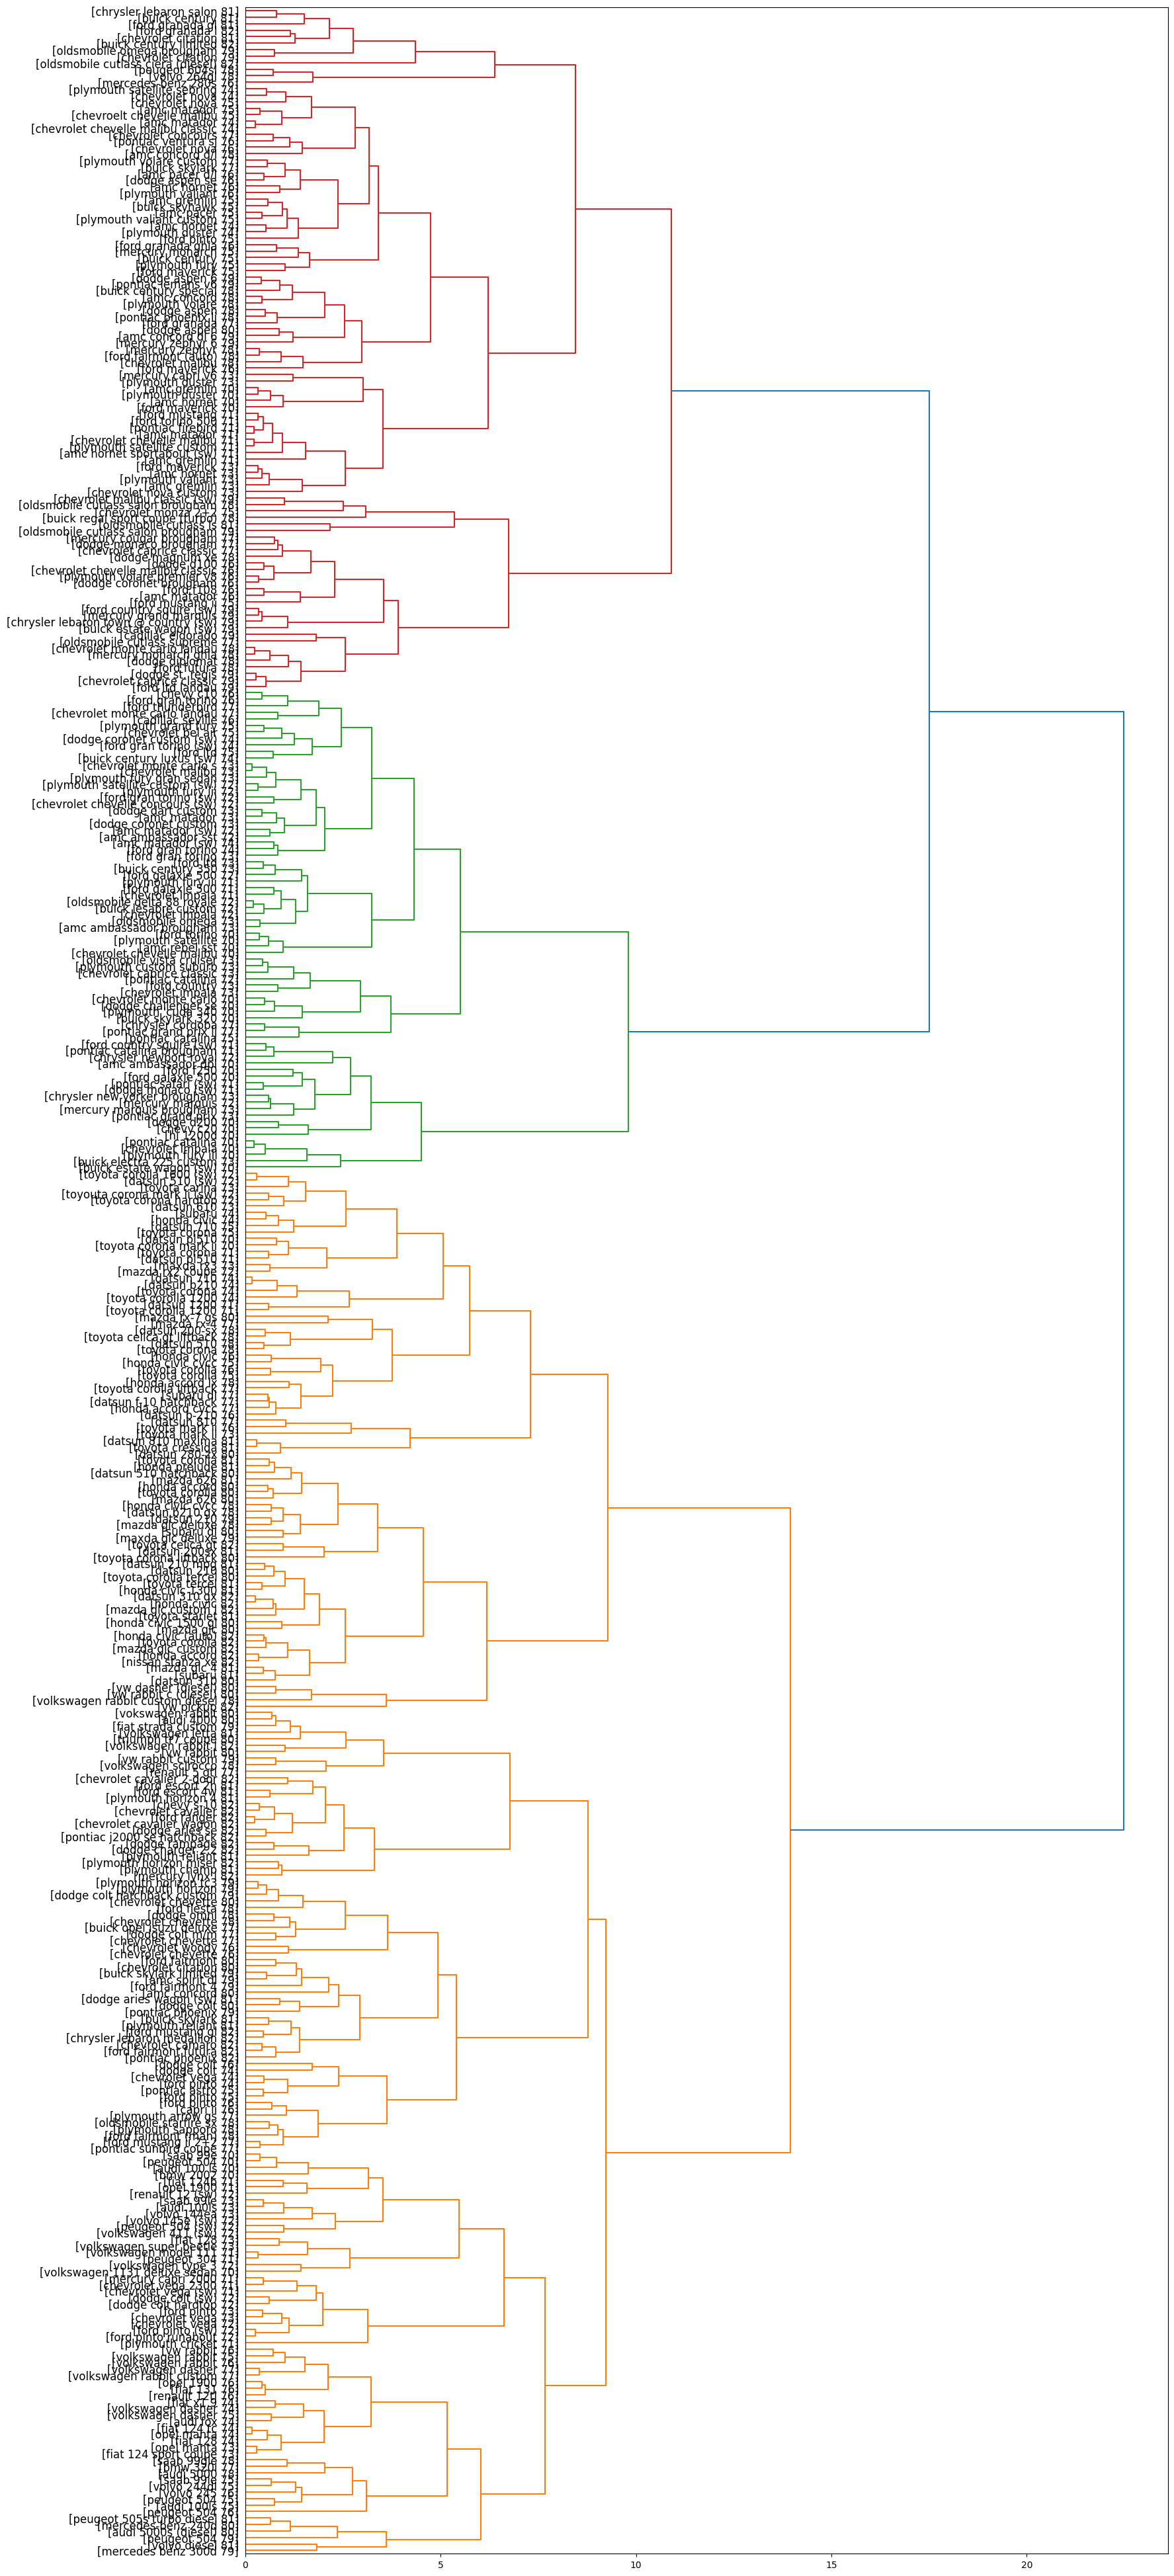

In [18]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s]' % (df['name'][id], df['year'][id])
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')